In [189]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [190]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [191]:
test_data = unpickle("../../cifar-10-batches-py/test_batch")

In [192]:
print(test_data.keys())
print(test_data[b'data'])

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[[158 159 165 ... 124 129 110]
 [235 231 232 ... 178 191 199]
 [158 158 139 ...   8   3   7]
 ...
 [ 20  19  15 ...  50  53  47]
 [ 25  15  23 ...  80  81  80]
 [ 73  98  99 ...  94  58  26]]


In [193]:
print(test_data[b'data'].shape)
print(test_data[b'batch_label'])
#print(test_data[b'filenames'])

(10000, 3072)
b'testing batch 1 of 1'


In [194]:
image_dataset = test_data[b'data']

img = image_dataset[0]
img = np.array(img)

#print(img.shape)
imgR = img[:1024].reshape(32,32)
imgG = img[1024:2048].reshape(32,32)
imgB = img[2048:3072].reshape(32,32)
'''
R [] 1024
G [] 1024
B [] 1024
'''

'\nR [] 1024\nG [] 1024\nB [] 1024\n'

In [195]:
from PIL import Image

img_RGB = np.zeros((32,32,3),'uint8')
print(img_RGB.shape)

img_RGB[:,:,0] = imgR
img_RGB[:,:,1] = imgG
img_RGB[:,:,2] = imgB

print(img_RGB.shape)
# plt.imshow(img_RGB)

img = Image.fromarray(img_RGB)
img.save('myimg.png')
image = mpimg.imread('./myimg.png')

(32, 32, 3)
(32, 32, 3)


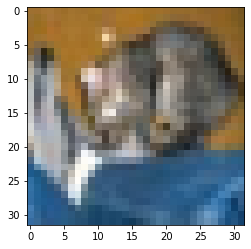

In [196]:
plt.imshow(img_RGB)
#plt.imshow(image)

[[0.45973608 0.45719843 0.47735686 ... 0.39086706 0.37047843 0.34446392]
 [0.45530157 0.44574706 0.46504941 ... 0.38862    0.36851412 0.35566314]
 [0.44772627 0.44096235 0.4532549  ... 0.40038471 0.38446824 0.35901922]
 ...
 [0.45459333 0.35739529 0.31145255 ... 0.34508    0.22092118 0.30770863]
 [0.42377137 0.36883961 0.30495569 ... 0.28847373 0.28984275 0.22647176]
 [0.39042667 0.38337216 0.32451098 ... 0.27108314 0.30046863 0.2365698 ]]


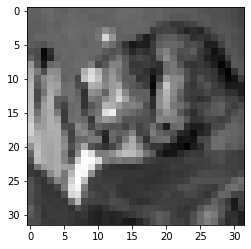

In [197]:
from skimage import color
image_gray = color.rgb2gray(img_RGB)
print(image_gray)
plt.imshow(image_gray, cmap = plt.get_cmap('gray'))

(32, 32, 3)


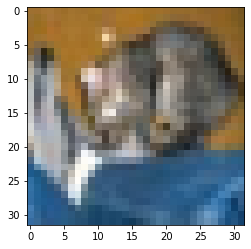

In [198]:
img = image_dataset[0]

img = np.array(img)

#print(img.shape)
imgR = img[:1024].reshape(32,32)
imgG = img[1024:2048].reshape(32,32)
imgB = img[2048:3072].reshape(32,32)


img_RGB = np.zeros((32,32,3),'uint8')
print(img_RGB.shape)

img_RGB[:,:,0] = imgR
img_RGB[:,:,1] = imgG
img_RGB[:,:,2] = imgB

#image_RGB=img_RGB.shape
image_gray = color.rgb2gray(img_RGB)


#image_gray = color.rgb2gray(img)
#image_grarray[:,:,0] = image_gray
#image_array[:,:,:,0] = img_RGB

#plt.imshow(img_RGB)

#print(img_RGB)
op[:,0] = np.reshape(img_RGB,(im_size*im_size*3,))
#print (op[:,0])
test_orig = np.reshape(op[:,0],(im_size*im_size*3,1))
im_orig = np.reshape(test_orig,(im_size,im_size,3))
plt.imshow(im_orig.astype('uint8'))
ip[:,0] = np.reshape(image_gray,(im_size*im_size,))

In [270]:
import random
import numpy as np
from numpy import linalg as LA

class Network(object):

    def __init__(self, sizes, std):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [std*np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [1/np.sqrt(x)*np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        self.gammas = [1 for y in sizes[:-1]]
        self.betas = [std*np.zeros((y, 1)) for y in sizes[:-1]]
#        self.betas = [std*np.random.randn(y, 1) for y in sizes[:-1]]
#        print np.abs(self.weights[0])
#        print np.abs(self.biases[0])
#        print zip(sizes[:-1], sizes[1:])
#        print np.max(np.abs(self.weights[0]))
        
    def feedforward(self, a):
        for b, w, gamma, beta in zip(self.biases, self.weights, 
                                                     self.gammas, self.betas):
            a, temp = batch_norm(a, 1e-5, gamma, beta)
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,lam,
            test_data=None):        
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            #print("mini_batsches=",mini_batches)
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta,lam)
            if test_data:
                print ("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print( "Epoch {0} complete".format(j))
                print( self.cost(training_data))
                print (self.gammas)
#                print (self.betas)

    def update_mini_batch(self, mini_batch, eta,lam):        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        nabla_gamma = [0 for gamma in self.gammas]
        nabla_beta = [np.zeros(beta.shape) for beta in self.betas]
        #print(mini_batch)
        for x in mini_batch[0]: 
            for y in mini_batch[1]:
                delta_nabla_b, delta_nabla_w, delta_nabla_gamma, \
                                        delta_nabla_beta  = self.backprop(x, y)
                nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
                nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]        
                nabla_gamma = [n_gamma+dn_gamma for n_gamma, dn_gamma \
                                   in zip(nabla_gamma, delta_nabla_gamma)]
                nabla_beta = [n_beta+dn_beta for n_beta, dn_beta \
                                  in zip(nabla_beta, delta_nabla_beta)]
        self.weights = [w-(eta/len(mini_batch))*nw-eta*lam*w\
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb \
                       for b, nb in zip(self.biases, nabla_b)]
        self.gammas = [g-(eta/len(mini_batch))*ng-eta*lam*g\
                       for g, ng in zip(self.gammas, nabla_gamma)]
        self.betas = [b-(eta/len(mini_batch))*nb \
                      for b, nb in zip(self.betas, nabla_beta)]
#        print np.abs(self.weights[0])
#        print np.abs(self.biases[0])
#        print eta/len(mini_batch)*np.max(nabla_w[-1]/self.weights[-1])
#        print np.max(np.abs(nabla_w[0]))
#        print np.abs(nabla_w[-1])
                
    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        nabla_gamma = [0 for g in self.gammas]
        nabla_beta = [np.zeros(b.shape) for b in self.betas]
        eps = 1e-5 #For numerical stability in BN layers
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        xb_array = [] # list to store the outputs of each BN layer
        zs = [] # list to store all the z vectors, layer by layer
        cache_array = [] # list to store the cache of each BN layer
        for b, w, gamma, beta in zip(self.biases, self.weights, \
                                     self.gammas, self.betas):
            xb, cache = batch_norm(activation, eps, gamma, beta)
            cache_array.append(cache)
            xb_array.append(xb)
            z = np.dot(w, xb)+b
            zs.append(z)            
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
        sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())        
        for l in range(2, self.num_layers):
            z = zs[-l]
            dout = np.dot(self.weights[-l+1].transpose(), delta)
            delta_b, nabla_gamma[-l+1], nabla_beta[-l+1] = batchnorm_backward \
            (dout, cache_array[-l+1], self.gammas[-l+1], self.betas[-l+1], eps)
            sp = sigmoid_prime(z)
            delta =  delta_b * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        dout = np.dot(self.weights[0].transpose(), delta)
        delta_b, nabla_gamma[0], nabla_beta[0] = batchnorm_backward(dout, \
                            cache_array[0],self.gammas[0],self.betas[0],eps)
        return (nabla_b, nabla_w, nabla_gamma, nabla_beta)

    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost(self, training_data):
        error = [self.feedforward(training_data[0][i])-training_data[1][i]
                        for i in range( len(training_data))]
        squared_error = 0
        for x in error:
            squared_error = squared_error + LA.norm(x)
        return squared_error            
        
    def cost_derivative(self, output_activations, y):
        # print len(output_activations)        
        output_activations
        return (output_activations-y)

def batch_norm(x,eps,gamma,beta):
    mean = np.mean(x)
    delta_x = x - mean
    var = np.sum((x - mean)**2)/(len(x)-1)
    sqrtvar = np.sqrt(var+eps)
    ivar = 1/sqrtvar
    xhat = delta_x*ivar
    print("xhat",xhat)
    print("gamma",gamma)
    print("beta=",beta)
    #out = gamma*xhat + beta
    cache = (xhat, mean, ivar, sqrtvar, var)
    return xhat, cache

def batchnorm_backward(dout, cache, gamma, beta, eps):
  #unfold the variables stored in cache
  xhat,xmu,ivar,sqrtvar,var = cache
  N,D = np.shape(dout)
  dbeta = dout
  dgammax = dout #not necessary, but more understandable
  dgamma = np.sum(dgammax*xhat, axis=0)
  dxhat = dgammax * gamma  
  divar = np.sum(dxhat*xmu, axis=0)
  dxmu1 = dxhat * ivar
  dsqrtvar = -1. /(sqrtvar**2) * divar  
  dvar = 0.5 * 1. /np.sqrt(var+eps) * dsqrtvar
  dsq = 1. /N * np.ones((N,D)) * dvar
  dxmu2 = 2 * xmu * dsq
  dx1 = (dxmu1 + dxmu2)
  dmu = -1 * np.sum(dxmu1+dxmu2, axis=0)
  dx2 = 1. /N * np.ones((N,D)) * dmu
  dx = dx1 + dx2
  return dx, dgamma, dbeta

def sigmoid(z):    
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [271]:
import numpy as np
import scipy
from scipy import misc
from scipy import io
import math

def load_data(ip,op,m,im_size):
    training_inputs = [np.reshape(ip[:,i],(im_size*im_size,1)) for i in range(m)]
    training_results = [np.reshape(op[:,i],(im_size*im_size*3,1)) for i in range(m)]
    training_data = [training_inputs, training_results]
    return training_data

In [272]:
import numpy as np
import math 
import os.path
import scipy
import skimage
from skimage import color
from skimage import io
from PIL import Image
import matplotlib.image as mpimg
#import matplotlib.pyplot as plt

def reader(m, im_size):    
    op = np.zeros((im_size*im_size*3,m)) #flattened output
    ip = np.zeros((im_size*im_size,m)) #flattened input
    image_grarray = np.zeros((im_size,im_size,m)) #grayscale image array
    image_array = np.zeros((im_size,im_size,3,m)) #original image array
#    a = ['0000','000','00','0']

    test_data = unpickle("../../cifar-10-batches-py/test_batch")
    image_dataset = test_data[b'data']
    for k in range(1,m+1):
        

        img = image_dataset[k-1]
        
        img = np.array(img)

        #print(img.shape)
        imgR = img[:1024].reshape(32,32)
        imgG = img[1024:2048].reshape(32,32)
        imgB = img[2048:3072].reshape(32,32)
        

        img_RGB = np.zeros((32,32,3), 'uint8')
       
        img_RGB[:,:,0] = imgR
        img_RGB[:,:,1] = imgG
        img_RGB[:,:,2] = imgB
        
        
        #img_RGB = Image.fromarray(img_RGB)
        
        #img.save('myimg.png')
        
        #image = mpimg.imread('/home/users/aravind2/cifar/'+jpgFilename)
        
        image_gray = color.rgb2gray(img_RGB)
        
        image_grarray[:,:,k-1] = image_gray
        image_array[:,:,:,k-1] = img_RGB
        
        op[:,k-1] = np.reshape(img_RGB,(im_size*im_size*3,))
        ip[:,k-1] = np.reshape(image_gray,(im_size*im_size,))
        
        
    return (ip, op)
    #plt.figure()
    #plt.subplot(2,1,1)
    #plt.imshow(image_array[:,:,:,0]) 
    #plt.title('Original')
    #plt.subplot(2,1,2)
    #plt.imshow(image_grarray[:,:,0],cmap='gray')
    #plt.title('Grayscale')
    #plt.show()

In [273]:
import sys
import numpy as np
#import matplotlib.pyplot as plt
import pickle


f = open('test.out','w')
#sys.stdout = f
print ('Starting!')
m = 10 #number of training examples
im_size = 32 #size of image (here 64x64)
#Reading the image files into a matrix

ip,op = reader(m,im_size)

#Reshaping the image matrices for the neural network
#import cifar_loader

training_data = load_data(ip,op,m,im_size)

print(len(training_data))
#print(ip)
#x =[ training_data[i][0] for i in range(len(training_data))]
#print(x)
#x=np.asarray(x)
#print(x.shape[0])


#Constructing the neural network and training it using SGD
#import network
std = 1e-4;
#net = network.Network([im_size*im_size,2048,1024,512,1024,2048,im_size*im_size*3],std)
net = Network([im_size*im_size,1024,im_size*im_size*3],std)
print ('SGD!')
net.SGD(training_data,500,10,3e-3,0)
#Dumping the net object to pickle
#with open('neural_net.pkl', 'wb') as output:
#    pickle.dump(net, output, pickle.HIGHEST_PROTOCOL)
with open('../../Colorization/cifar.npz', 'wb') as output:
    np.savez(output,net.weights[0],net.weights[1],net.biases[0],net.biases[1],\
    	net.gammas[0],net.gammas[1],net.betas[0],net.betas[1])    

print('finished')

Starting!
2
SGD!
xhat [[ 1.06348867]
 [ 0.07746566]
 [-1.27295716]
 ...
 [-1.87314508]
 [-0.88712207]
 [ 0.0345951 ]]
gamma 1
beta= [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


ValueError: shapes (1024,1024) and (3072,1) not aligned: 1024 (dim 1) != 3072 (dim 0)

In [ ]:
#Testing on 1st image
print ('Testing!')
test_noise = np.reshape(ip[:,0],(im_size*im_size,1))
test_orig = np.reshape(op[:,0],(im_size*im_size*3,1))
test_out = net.feedforward(test_noise)

im_noise = np.reshape(test_noise,(im_size,im_size))
im_out = np.reshape(test_out,(im_size,im_size,3))
im_orig = np.reshape(test_orig,(im_size,im_size,3))


#Plotting figure
plt.figure()
plt.subplot(1,3,1)
plt.imshow(im_orig.astype('uint8'), cmap='gray')
plt.title('Original grayscale')
plt.subplot(1,3,2)
plt.imshow(im_noise,cmap='gray')
plt.title('Noisy image')
plt.subplot(1,3,3)
plt.imshow(im_out)
plt.title('Output image')
plt.show()
f.close()